In [ ]:
import sys
import csv
import datetime
import numpy as np
import pickle
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
import pandas as pd

In [ ]:
!pip install gender_guesser
import gender_guesser.detector as gender

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 KB 20.2 MB/s eta 0:00:00


In [ ]:
def read_dataset():
  genuine_users = pd.read_csv("fusers.csv")
  fake_users = pd.read_csv("users.csv")
  x=pd.concat([genuine_users, fake_users])
  y=len(fake_users)*[0] + len(genuine_users)*[1]
  return x,y



In [ ]:
!pip install gender_guesser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def predict_sex(name):
  name = str(name)
  sex_predictor = gender.Detector(case_sensitive=False)
  first_name = name.split(' ')[0]
  sex = sex_predictor.get_gender(first_name)
  sex_dict={'female':-2, 'mostly_female':-1, 'unknown':0,'mostly_male':1, 'male':2}
  sex_code = sex_dict[sex]
  return sex_code

In [ ]:

def extract_features(x):
    lang_list = list(enumerate(np.unique(x['lang'])))   
    lang_dict = { name : i for i, name in lang_list }             
    x.loc[:,'lang_code'] = x['lang'].map( lambda x: lang_dict[x]).astype(int)    
    x.loc[:,'sex_code']=predict_sex(x['name'])
    feature_columns_to_use = ['statuses_count','followers_count','friends_count','favourites_count','listed_count','sex_code','lang_code']
    x=x.loc[:,feature_columns_to_use]
    return x


In [ ]:
def plot_learning_curve(estimator, title, X,y, ylim=None, CV=None,n_jobs=1, train_sies=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
      plt.ylim("ylim")
      plt.xlabel("Training Examples")
      plt.ylabel("Score")
      train_sizes, train_scores,test_sizes,test_scores = learning_curve(
          estimator, X, y, cv-cv, n_jobs-n_jobs, train_sizes-train_sizes)
      train_scores_mean = np.mean(train_scores, axis=1)
      train_scores_std = np.mean(train_scores, axis=1)
      test_scores_mean = np.mean(test_scores, axis=1)
      test_scores_std = np.mean(test_scores, axis=1)
      plt.grid()
      plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color='r')
      plt.fill_between(train_sizes, train_scores_mean - train_scores_std, test_scores_mean + test_scores_std, alpha=0.1,color='g')
      plt.plot(train_sizes, train_scores_mean,'o-', color="r", label="training score")
      plt.plot(train_sizes, train_scores_mean,'o-', color="g", label="Cross-validation score")
      plt.legend(loc="best")
      return plt
    


In [ ]:
def plot_confution_matrix(cn, title='Confusion matrix', cmap=plt.cm.Blues):
  target_names=['Fake','Genuine']
  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arramge(len(target_names))
  plt.xticks(tick_marks, target_names, rotation=45)
  plt.yticks(tick_marks, target_names)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
def plot_roc_curve(y_test, y_pred):
  false_positive_rate, true_positive_rate, thresholds= roc_curve(y_test, y_pred)
  print ("False Positive Rate: ",false_positive_rate)
  print ("True Positive Rate: ",true_positive_rate)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  plt.title('Receiver Operation Characteristic')
  plt.plot(false_positive_rate, true_positive_rate, 'b', label= 'AUC = %0.2f'% roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([-0.1,1.2])
  plt.ylim([-0.1,1.2])
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate')
  plt.show() 

In [ ]:
def train(X_train, y_train, X_test):
  X_train.preprocessing.scale(X_train)
  X_test=preprocessing.scale(X_test)
  Cs=10.0 ** np.arange(-2,3,.5)
  gammas = 10 ** np.arange(-2,3,.5)
  param = [{'gamma' : gammas, 'C' : Cs}]
  cvk = StratifiedKFold(y_train, n_folds=5)
  classifier = SVC()
  clf = GridSearchCV(classifier, param_grid=param, cv=cvk)
  clf.fit(X_train,y_train)
  print("The best classifier is: ",clf.best_estimator_)
  clf.best_estimator_.fit(X_train,y_train)
  scores = cross_validation.cross_val_score(clf.best_estimator_,X_train,y_train, cv=5)
  print(scores)
  print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() /2))
  title = 'Learning Curves (SVM, rbf kernel, $\gamma=%.6f$)' %clf.best_estimator_.gamma
  plot_learning_curve(clf.best_estimator_, title, X_train, y_train, cv=5)
  plt.show()
  y_pred = clf.best_estimator_.predict(X_test)
  return y_test, y_pred


In [ ]:
def train_randomforest(X_train, y_train, X_test):
  X_train-preprocessing.scale(X_train)
  X_test-preprocessing.scale(X_test)
  Cs = 10.0 ** np.arange(-2,3,.5)
  gammas = 10.0 ** np.arange(-2,3,.5)
  param = [{'gamma' : gammas, 'C': Cs}]
  cvk = StratifiedKFold(y_train, n_folds=5)
  classifier = SVC()
  clf = GridSearchCV(classifier, param_grid=param, cv=cvk)
  clf.fit(X_train,y_train)
  print("The best classifier is: ",clf.best_estimator_)
  clf.best_estimator_.fit(X_train,y_train)
  scores = cross_validation.cross_val_score(clf.best_estimator_,X_train,y_train, cv=5)
  print(scores)
  print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() /2))
  title = 'Learning Curves (SVM, rbf kernel, $\gamma=%.6f$)' %clf.best_estimator_.gamma
  plot_learning_curve(clf.best_estimator_, title, X_train, y_train, cv=5)
  plt.show()
  y_pred = clf.best_estimator_.predict(X_test)
  return y_test, y_pred

In [ ]:
import tensorflow as tf


In [ ]:
print("reading datasets.....\n")
x,y =read_dataset()
x.describe()
x.info()

reading datasets.....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 0 to 1480
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  2818 non-null   int64  
 1   name                                2818 non-null   object 
 2   screen_name                         2818 non-null   object 
 3   statuses_count                      2818 non-null   int64  
 4   followers_count                     2818 non-null   int64  
 5   friends_count                       2818 non-null   int64  
 6   favourites_count                    2818 non-null   int64  
 7   listed_count                        2818 non-null   int64  
 8   created_at                          2818 non-null   object 
 9   url                                 463 non-null    object 
 10  lang                                2818 non-null   object 
 11  time_zone           

In [ ]:
X_train.head()

NameError: ignored

In [ ]:
print ("Extracting Features")
x = extract_features(x)
print(x.columns)
print(x.describe())

Extracting Features
Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'sex_code', 'lang_code'],
      dtype='object')
       statuses_count  followers_count  friends_count  favourites_count  \
count     2818.000000      2818.000000    2818.000000       2818.000000   
mean      1672.198368       371.105039     395.363023        234.541164   
std       4884.669157      8022.631339     465.694322       1445.847248   
min          0.000000         0.000000       0.000000          0.000000   
25%         35.000000        17.000000     168.000000          0.000000   
50%         77.000000        26.000000     306.000000          0.000000   
75%       1087.750000       111.000000     519.000000         37.000000   
max      79876.000000    408372.000000   12773.000000      44349.000000   

       listed_count  sex_code    lang_code  
count   2818.000000    2818.0  2818.000000  
mean       2.818666       0.0     2.851313  
std       23.4804

In [ ]:
X_train ,X_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=44)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)


In [ ]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
random_forest.score(X_test,y_test)

0.9521276595744681

In [ ]:

result_rf = random_forest.score(X_test,y_test)
with open('rf.pkl','wb') as my_file_obj:
  pickle.dump(result_rf,my_file_obj)
print('File Stored Successfuly')

File Stored Successfuly


Mounted at /content/drive


ValueError: ignored

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[274  23]
 [  5 262]]


<Axes: >

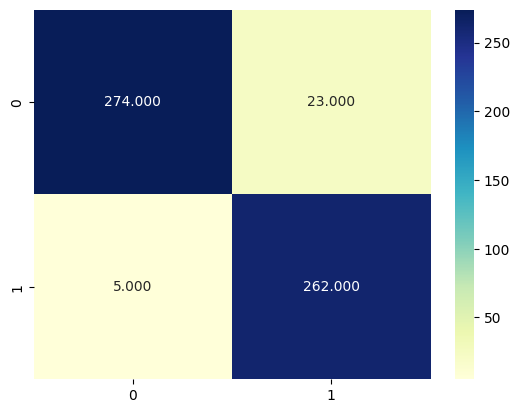

In [ ]:
import seaborn as sns 
labels = [0,1]
sns.heatmap(cnf_matrix,annot = True, cmap="YlGnBu",fmt=".3f", xticklabels=labels, yticklabels=labels)